# **MADAM CODE**

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 166ms/step - accuracy: 0.5955 - loss: 0.6577 - val_accuracy: 0.6446 - val_loss: 0.6239
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 160ms/step - accuracy: 0.8089 - loss: 0.4490 - val_accuracy: 0.5482 - val_loss: 0.6959
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 161ms/step - accuracy: 0.6849 - loss: 0.6117 - val_accuracy: 0.7678 - val_loss: 0.4901
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.7874 - loss: 0.4439 - val_accuracy: 0.7880 - val_loss: 0.4812
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 50s 160ms/step - accuracy: 0.9041 - loss: 0.2495 - val_accuracy: 0.7910 - val_loss: 0.5076
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7913 - loss: 0.5076
Test Accuracy: 0.80


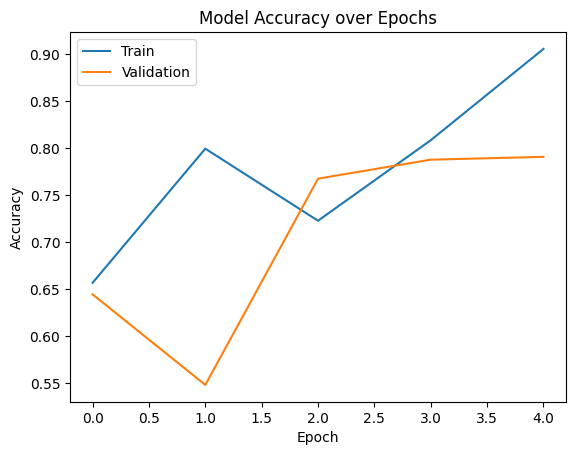

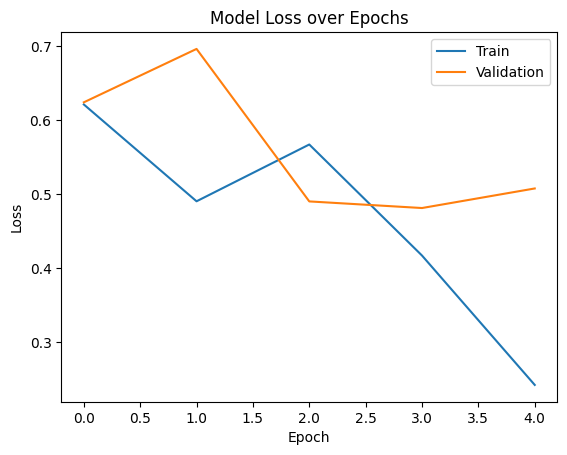

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Predicted Sentiment: Negative


In [1]:
# 1. Import necessary libraries
import numpy as np  # Import NumPy for numerical computations, arrays, and mathematical operations
from tensorflow.keras.datasets import imdb  # Import the IMDB dataset of movie reviews, preprocessed as integer sequences
from tensorflow.keras.models import Sequential  # Import Sequential model to build a stack of layers in order
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Import neural network layers: embedding, RNN, and fully connected
from tensorflow.keras.preprocessing import sequence  # Import sequence preprocessing utilities for padding/truncating sequences

# 2. Set parameters for the dataset
max_features = 10000  # Consider only the top 10,000 most frequently occurring words in the dataset. Less frequent words will be ignored.
maxlen = 500  # Maximum length of a review in words. Longer reviews will be truncated and shorter ones padded with zeros.

# 3. Load the IMDB dataset
# The dataset returns integer-encoded reviews (each word is replaced by an integer index)
# x_train, y_train: training reviews and labels (0 = negative, 1 = positive)
# x_test, y_test: test reviews and labels
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences so that all reviews have the same length
# Neural networks require fixed input sizes, so we pad shorter sequences with zeros at the beginning or end
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)  # Pad or truncate training reviews to maxlen
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)  # Pad or truncate test reviews to maxlen

# 5. Build the RNN model
model = Sequential()  # Initialize an empty sequential model to stack layers

# Embedding layer converts integer-encoded words into dense vectors of fixed size (embedding dimension = 32)
# This allows the network to learn relationships between words and represent them in a continuous vector space
model.add(Embedding(max_features, 32))  # Input dimension = vocab size, output dimension = 32, input_length = maxlen by default

# SimpleRNN layer with 32 hidden units
# Processes the sequence of word embeddings step by step and maintains a hidden state as memory
# The hidden state captures information about previous words in the sequence
model.add(SimpleRNN(32))

# Dense layer with 1 neuron and sigmoid activation for binary classification
# Sigmoid outputs a probability between 0 and 1, representing the likelihood of a positive review
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
# Optimizer 'adam' efficiently updates weights using gradients
# Loss function 'binary_crossentropy' measures how well predictions match binary labels
# Metric 'accuracy' monitors the fraction of correctly predicted reviews
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train the model
# Train on x_train, y_train data
# epochs=5: number of passes over the entire training data
# batch_size=64: number of samples processed before updating the weights
# validation_split=0.2: 20% of training data is used to evaluate model performance after each epoch
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 8. Evaluate the model on test data
# Returns loss and accuracy on unseen test data, to see how well the model generalizes
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")  # Print test accuracy formatted to 2 decimal places

# 9. Plot training and validation accuracy and loss
import matplotlib.pyplot as plt  # Import matplotlib for visualization

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])  # Training accuracy
plt.plot(history.history['val_accuracy'])  # Validation accuracy
plt.title('Model Accuracy over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Accuracy')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# Plot training and validation loss over epochs
plt.plot(history.history['loss'])  # Training loss
plt.plot(history.history['val_loss'])  # Validation loss
plt.title('Model Loss over Epochs')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('Loss')  # Y-axis label
plt.legend(['Train', 'Validation'])  # Legend to distinguish curves
plt.show()  # Display the plot

# 10. Predict sentiment on a sample review
# For demonstration, we use an existing review from x_test
sample_review = x_test[0]  # Take the first review from the test set
sample_review_input = np.expand_dims(sample_review, axis=0)  # Add batch dimension because model expects a batch of inputs
prediction = model.predict(sample_review_input)[0][0]  # Predict probability of positive sentiment

# Interpret the prediction
if prediction > 0.5:
    print("Predicted Sentiment: Positive")  # Probability > 0.5 indicates positive review
else:
    print("Predicted Sentiment: Negative")  # Probability <= 0.5 indicates negative review

# **UPDATION**


In [2]:
max_features = 5000
maxlen = 250

## **Load and Preprocess IMDB Dataset**



In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# 3. Load the IMDB dataset with updated max_features
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences to the updated maxlen
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"IMDB dataset loaded with max_features={max_features} and sequences padded to maxlen={maxlen}.")
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

IMDB dataset loaded with max_features=5000 and sequences padded to maxlen=250.
Shape of x_train: (25000, 250)
Shape of x_test: (25000, 250)


## **Build and Compile RNN Model**




In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# 5. Build the RNN model with updated parameters
model = Sequential()  # Initialize an empty sequential model to stack layers

# Embedding layer with updated embedding dimension (64)
model.add(Embedding(max_features, 64))  # Input dimension = vocab size, output dimension = 64

# SimpleRNN layer with updated 64 hidden units
model.add(SimpleRNN(64))

# Dense layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# 6. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("RNN model built and compiled with updated parameters:")
model.summary()

RNN model built and compiled with updated parameters:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
print("Model training completed with updated epochs and batch size.")

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - accuracy: 0.5701 - loss: 0.6696 - val_accuracy: 0.7370 - val_loss: 0.5281
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 138ms/step - accuracy: 0.8043 - loss: 0.4420 - val_accuracy: 0.6760 - val_loss: 0.5996
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.8203 - loss: 0.4123 - val_accuracy: 0.8158 - val_loss: 0.4241
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 22s 138ms/step - accuracy: 0.9382 - loss: 0.1797 - val_accuracy: 0.7870 - val_loss: 0.5077
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 153ms/step - accuracy: 0.9783 - loss: 0.0793 - val_accuracy: 0.7786 - val_loss: 0.6088
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 145ms/step - accuracy: 0.9958 - loss: 0.0269 - val_accuracy: 0.8242 - val_loss: 0.6980
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.9957 - loss: 0.0207 - val_accuracy: 0.8176 - val_loss: 0.7114
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 122ms/step - accuracy: 0.9993 - loss: 0

## **Evaluate and Visualize Model Performance**



782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8023 - loss: 0.8750
Test Accuracy: 0.80


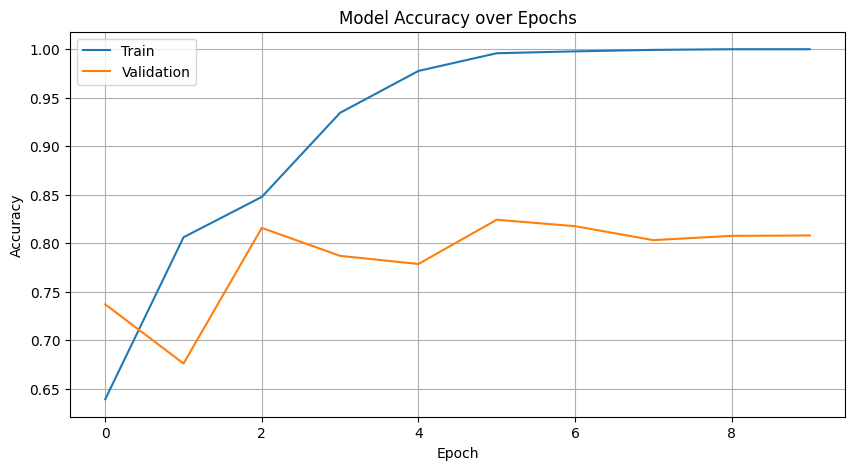

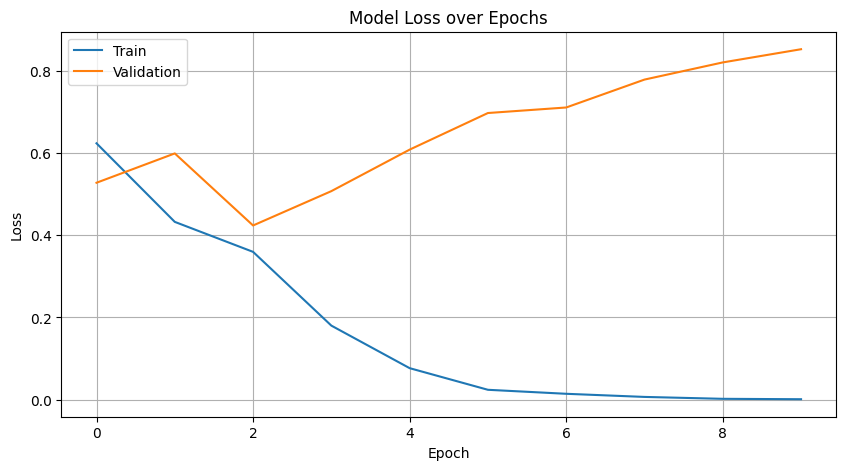

In [6]:
import matplotlib.pyplot as plt

# 8. Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot training and validation accuracy and loss

# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [7]:
import numpy as np

# 10. Predict sentiment on a sample review
# For demonstration, we use an existing review from x_test
sample_review = x_test[0]  # Take the first review from the test set
sample_review_input = np.expand_dims(sample_review, axis=0)  # Add batch dimension because model expects a batch of inputs
prediction = model.predict(sample_review_input)[0][0]  # Predict probability of positive sentiment

# Interpret the prediction
if prediction > 0.5:
    print(f"Predicted Sentiment: Positive (Probability: {prediction:.2f})")  # Probability > 0.5 indicates positive review
else:
    print(f"Predicted Sentiment: Negative (Probability: {prediction:.2f})")  # Probability <= 0.5 indicates negative review

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
Predicted Sentiment: Negative (Probability: 0.00)


## **Predict Sentiment on a Custom Review**




In [8]:
from tensorflow.keras.datasets import imdb # Ensure imdb is imported for get_word_index

# 1. Retrieve the IMDB word index
word_index = imdb.get_word_index()
print("IMDB word index retrieved.")

# 2. Create a reverse word index (mapping integers to words)
# The IMDB dataset reserves indices 0, 1, and 2 for 'padding', 'start of sequence', and 'unknown' respectively.
reverse_word_index = dict([(value + 3, key) for (key, value) in word_index.items()])
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNKNOWN>"
reverse_word_index[3] = "<UNUSED>" # This is for consistency, as original word_index starts from 1

print("Reverse word index created.")

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
IMDB word index retrieved.
Reverse word index created.


In [9]:
def preprocess_review(text, word_index, maxlen, max_features):
    # 1. Convert the input text to lowercase.
    text = text.lower()
    # 2. Split the text into individual words.
    words = text.split()

    # 3. Convert each word to its corresponding integer index
    # Words not found in the index should be replaced with a special 'unknown' token index (2).
    # IMDB uses 1 for <START>, 2 for <UNKNOWN>, 0 for <PAD>.
    # The word_index itself starts from 1, so we add 3 to map them to indices >= 4.
    # Words outside max_features are also treated as unknown.

    # We need to map the original word_index values to start from 4
    # Original word_index maps words to indices 1 to N.
    # Model expects 0: PAD, 1: START, 2: UNKNOWN, 3: UNUSED.
    # So actual words should map to index+3.

    # Create a mapping that aligns with how the IMDB dataset processes words
    # where 1 is <START>, 2 is <UNK>, 0 is <PAD>.
    # The `imdb.load_data` function typically does this remapping internally,
    # so a word with original index `i` becomes `i+3` for consistency with special tokens.

    encoded_review = []
    for word in words:
        # Get the index from word_index, add 3 for consistency with load_data
        # If word is not in word_index, default to 2 (UNKNOWN token).
        # Also, check if the index is within max_features.
        word_idx = word_index.get(word, 2) # Default to 2 (UNKNOWN)
        if word_idx < max_features - 3: # Adjust for the 3 reserved indices
            encoded_review.append(word_idx + 3) # Add 3 to match dataset indexing
        else:
            encoded_review.append(2) # Treat as unknown if outside max_features

    # Add the start-of-sequence token (1)
    encoded_review = [1] + encoded_review

    # 4. Pad or truncate the sequence of word indices to maxlen
    # Use tensorflow.keras.preprocessing.sequence.pad_sequences
    padded_review = sequence.pad_sequences([encoded_review], maxlen=maxlen)

    # 5. Ensure the padded sequence has a batch dimension
    # np.expand_dims is already handled by pad_sequences here, as it expects a list of sequences.
    # So, padded_review will be a 2D array: (1, maxlen)
    return padded_review

print("Preprocessing function 'preprocess_review' defined.")

Preprocessing function 'preprocess_review' defined.


In [10]:
import numpy as np

# 4. Prompt the user to enter a movie review.
user_review_text = input("Please enter your movie review: ")

# 5. Preprocess the user's input review.
# Ensure 'maxlen' and 'max_features' are accessible (they are global from previous cells)
processed_user_review = preprocess_review(user_review_text, word_index, maxlen, max_features)

# 6. Use the trained model to predict the sentiment of the preprocessed review.
prediction = model.predict(processed_user_review)[0][0]

# 7. Print the predicted sentiment and probability.
if prediction > 0.5:
    sentiment = "Positive"
else:
    sentiment = "Negative"

print(f"\nUser Review: '{user_review_text}'")
print(f"Predicted Sentiment: {sentiment} (Probability: {prediction:.2f})")


Please enter your movie review: good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step

User Review: 'good'
Predicted Sentiment: Negative (Probability: 0.00)


# **Again Result Reproduce**

# Task
Create a single code cell that defines the parameters `max_features = 30000`, `maxlen = 400`, `epochs = 7`, and `batch_size = 50`. This cell will then load and preprocess the IMDB dataset, build an RNN model using these parameters with a ReLU activation function in the hidden layer and remove the `input_length` argument from the `Embedding` layer. Compile the model with `optimizer='adam'`, `loss='binary_crossentropy'`, and metrics including `'accuracy'`, `tf.keras.metrics.Recall(name='recall')`, `tf.keras.metrics.Precision(name='precision')`, and a custom `F1Score` metric that uses `tf.where` in its `result` method to prevent `OperatorNotAllowedInGraphError`. Train the model, evaluate it on the test set, print the accuracy and other metrics, plot the training history, and finally predict the sentiment on a sample test review and two custom reviews.

Defined parameters: max_features=30000, maxlen=400, epochs=7, batch_size=50
IMDB dataset loaded and padded. x_train shape: (25000, 400), x_test shape: (25000, 400)
F1Score custom metric class defined.
RNN model built and compiled with ReLU activation and custom metrics.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 59s 140ms/step - accuracy: 0.6051 - f1_score: 0.6542 - loss: 0.6716 - precision: 0.5845 - recall: 0.7445 - val_accuracy: 0.7576 - val_f1_score: 0.7453 - val_loss: 0.4986 - val_precision: 0.7746 - val_recall: 0.7181
Epoch 2/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 141ms/step - accuracy: 0.8412 - f1_score: 0.8412 - loss: 0.3675 - precision: 0.8412 - recall: 0.8414 - val_accuracy: 0.7978 - val_f1_score: 0.7990 - val_loss: 0.4444 - val_precision: 0.7845 - val_recall: 0.8141
Epoch 3/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 56s 141ms/step - accuracy: 0.8977 - f1_score: 0.8972 - loss: 0.2644 - precision: 0.9086 - recall: 0.8863 - val_accuracy: 0.8412 - val_f1_score: 0.8454 - val_loss: 0.4386 - val_precision: 0.8140 - val_recall: 0.8793
Epoch 4/7
400/400 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step - accuracy: 0.8942 - f1_score: 0.8904 - loss: 0.2690 - precision: 0.9193 - recall: 0.8645 - val_accuracy: 0.8068 - val_f1_score: 0.7927 - val_loss: 0.4430 - val_precision: 0.8430 - val

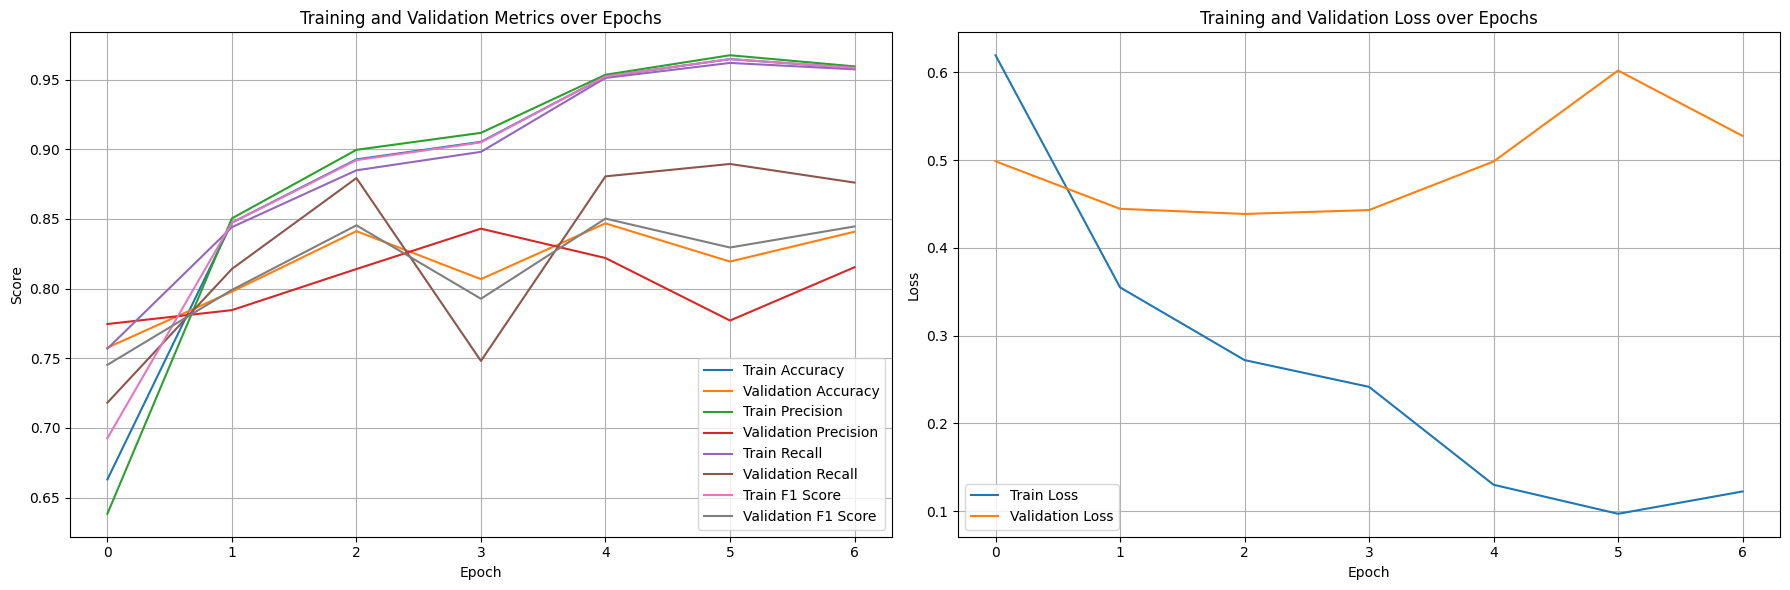

Training and validation history plots displayed.

Sample Test Review (Index 0):
Actual Label: Negative
Predicted Sentiment: Negative (Probability: 0.07)

'preprocess_custom_review' function defined.
IMDB word index retrieved for custom review preprocessing.
Custom reviews defined.

Predicting sentiment for custom reviews:
Custom Review 1: 'This movie was fantastic! I loved every minute of it. The acting was superb and the story was captivating.'
Predicted Sentiment: Positive (Probability: 0.98)
Custom Review 2: 'What a terrible film. Absolutely boring and poorly directed. I regret watching this trash.'
Predicted Sentiment: Negative (Probability: 0.00)


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Define the updated parameters
max_features = 30000
maxlen = 400
epochs = 7
batch_size = 50

print(f"Defined parameters: max_features={max_features}, maxlen={maxlen}, epochs={epochs}, batch_size={batch_size}")

# 3. Load the IMDB dataset with updated max_features
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences to the updated maxlen
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"IMDB dataset loaded and padded. x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")

# 5. Define the F1Score custom metric class
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = tf.keras.metrics.Precision()
        self.recall = tf.keras.metrics.Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred_binary = tf.cast(y_pred > 0.5, tf.float32) # Convert probabilities to binary (0 or 1)
        y_true_float = tf.cast(y_true, tf.float32)
        self.precision.update_state(y_true_float, y_pred_binary, sample_weight)
        self.recall.update_state(y_true_float, y_pred_binary, sample_weight)

    def result(self):
        p = self.precision.result()
        r = self.recall.result()
        # Use tf.where to handle division by zero symbolically
        return tf.where(tf.math.equal(p + r, 0), 0.0, 2 * ((p * r) / (p + r + tf.keras.backend.epsilon())))

    def reset_state(self):
        self.precision.reset_state()
        self.recall.reset_state()

print("F1Score custom metric class defined.")

# 6. Build a Sequential RNN model
model = Sequential()
# Removed input_length as it's deprecated
model.add(Embedding(max_features, 64))
model.add(SimpleRNN(64, activation='relu')) # SimpleRNN with ReLU activation
model.add(Dense(1, activation='sigmoid'))

# 7. Compile the model with custom metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       F1Score()]) # Include F1Score

print("RNN model built and compiled with ReLU activation and custom metrics.")
model.summary()

# 8. Train the model
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    verbose=1)

print("Model training completed.")

# 9. Evaluate the trained model on the test data
print("\nEvaluating model on test data...")
results = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test Precision: {results[2]:.4f}")
print(f"Test Recall: {results[3]:.4f}")
print(f"Test F1 Score: {results[4]:.4f}")

# 10. Plot the training and validation history
plt.figure(figsize=(18, 6))

# Plot metrics (accuracy, precision, recall, f1_score)
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.plot(history.history['f1_score'], label='Train F1 Score')
plt.plot(history.history['val_f1_score'], label='Validation F1 Score')
plt.title('Training and Validation Metrics over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training and validation history plots displayed.")

# 11. Predict sentiment on a sample review from x_test
sample_review_idx = 0
sample_review = x_test[sample_review_idx]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction_sample = model.predict(sample_review_input, verbose=0)[0][0]

sentiment_sample = "Positive" if prediction_sample > 0.5 else "Negative"
print(f"\nSample Test Review (Index {sample_review_idx}):")
print(f"Actual Label: {'Positive' if y_test[sample_review_idx] == 1 else 'Negative'}")
print(f"Predicted Sentiment: {sentiment_sample} (Probability: {prediction_sample:.2f})")

# 12. Define the preprocess_custom_review function
def preprocess_custom_review(text, word_index, maxlen, max_features):
    text = text.lower()
    words = text.split()

    # The IMDB dataset reserves indices 0, 1, 2, 3 for padding, start, unknown, unused.
    # So, actual words from word_index (which start from 1) are remapped by adding 3.
    # Words not in word_index or beyond max_features are mapped to 2 (unknown).

    encoded_review = []
    for word in words:
        # Get original index, default to 2 (unknown) if not found.
        original_idx = word_index.get(word)

        # Map to dataset's internal representation if within max_features
        # +3 is for <PAD>, <START>, <UNKNOWN> tokens at 0, 1, 2
        if original_idx is not None and (original_idx + 3) < max_features:
            encoded_review.append(original_idx + 3)
        else:
            encoded_review.append(2) # Treat as unknown if not found or beyond max_features

    # Add the start-of-sequence token (1)
    encoded_review = [1] + encoded_review

    # Pad or truncate the sequence
    padded_review = sequence.pad_sequences([encoded_review], maxlen=maxlen)

    return padded_review

print("\n'preprocess_custom_review' function defined.")

# 13. Get the IMDB word index
word_index = imdb.get_word_index()
print("IMDB word index retrieved for custom review preprocessing.")

# 14. Define two example custom reviews
custom_review_positive = "This movie was fantastic! I loved every minute of it. The acting was superb and the story was captivating."
custom_review_negative = "What a terrible film. Absolutely boring and poorly directed. I regret watching this trash."

print("Custom reviews defined.")

# 15. Preprocess and predict sentiment for custom reviews
print("\nPredicting sentiment for custom reviews:")

# Positive review
processed_pos_review = preprocess_custom_review(custom_review_positive, word_index, maxlen, max_features)
prediction_pos = model.predict(processed_pos_review, verbose=0)[0][0]
sentiment_pos = "Positive" if prediction_pos > 0.5 else "Negative"
print(f"Custom Review 1: '{custom_review_positive}'")
print(f"Predicted Sentiment: {sentiment_pos} (Probability: {prediction_pos:.2f})")

# Negative review
processed_neg_review = preprocess_custom_review(custom_review_negative, word_index, maxlen, max_features)
prediction_neg = model.predict(processed_neg_review, verbose=0)[0][0]
sentiment_neg = "Positive" if prediction_neg > 0.5 else "Negative"
print(f"Custom Review 2: '{custom_review_negative}'")
print(f"Predicted Sentiment: {sentiment_neg} (Probability: {prediction_neg:.2f})")